In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# 2330
df = pd.read_csv('2330.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,36.650322,2.006623e+11
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,37.473900,4.024668e+11
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,36.650322,1.975457e+11
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,35.620773,2.352703e+11
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,36.856174,2.761717e+11
...,...,...,...,...,...,...,...
5263,2021-01-05,536.000000,542.000000,535.000000,542.000000,542.000000,3.441187e+07
5264,2021-01-06,555.000000,555.000000,541.000000,549.000000,549.000000,5.303055e+07
5265,2021-01-07,554.000000,570.000000,553.000000,565.000000,565.000000,5.116678e+07
5266,2021-01-08,580.000000,580.000000,571.000000,580.000000,580.000000,5.956356e+07


In [3]:
n = 120

In [4]:
df = df.loc[df['Date'] > '2018-10-01']
len(df)

555

In [5]:
df['Volume'].fillna(0).astype('int')

4713    38391491
4714    25228536
4715    36408727
4716    40204660
4717    50876958
          ...   
5263    34411866
5264    53030554
5265    51166782
5266    59563555
5267    48810990
Name: Volume, Length: 555, dtype: int64

In [6]:
df['Volume'].fillna(0).astype('int').apply(lambda x: x/1000)

4713    38391.491
4714    25228.536
4715    36408.727
4716    40204.660
4717    50876.958
          ...    
5263    34411.866
5264    53030.554
5265    51166.782
5266    59563.555
5267    48810.990
Name: Volume, Length: 555, dtype: float64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_916/2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 4713 to 5267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       555 non-null    datetime64[ns]
 1   Open       555 non-null    float64       
 2   High       555 non-null    float64       
 3   Low        555 non-null    float64       
 4   Close      555 non-null    float64       
 5   Adj Close  555 non-null    float64       
 6   Volume     555 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 34.7 KB


<AxesSubplot:xlabel='Date'>

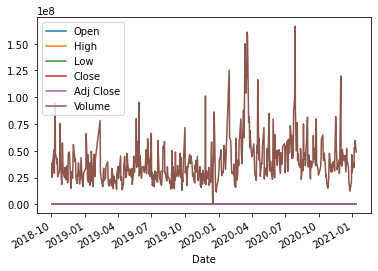

In [9]:
df.plot(x='Date')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

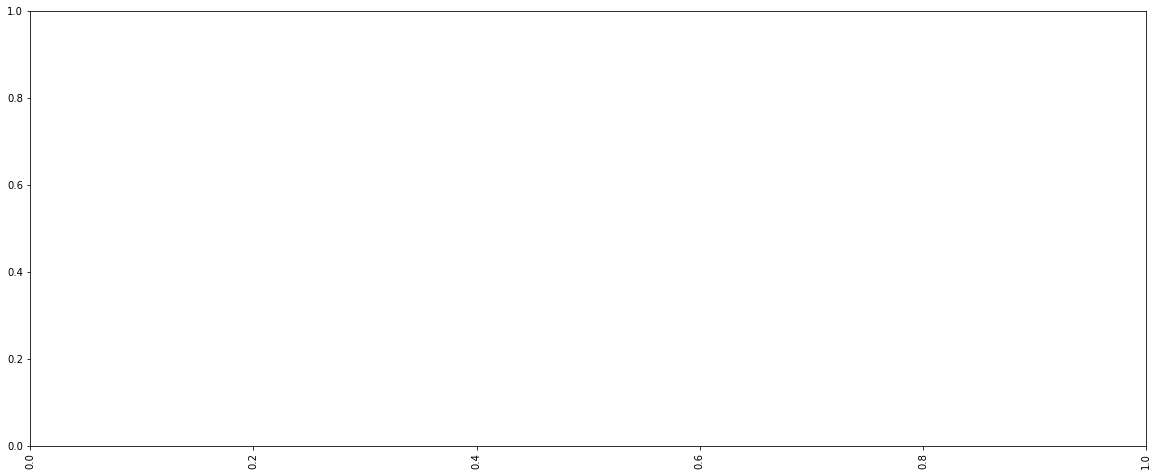

In [10]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

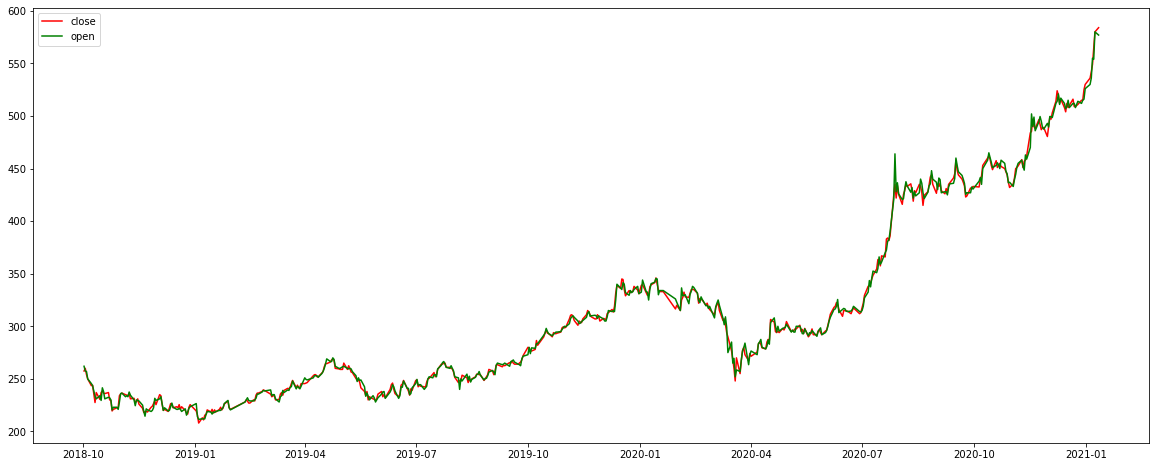

In [11]:
fig = plt.figure(figsize=(20,8))
# plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(df['Date'],df['Close'], color='red', label='close')
ax1.plot(df['Date'],df['Open'], color='green', label='open')
plt.legend()
#ax2 = ax1.twinx()
#plt.bar(df['Date'], df['Volume'].fillna(0).astype('int')//100000)
#ax3 = ax1.twinx()
plt.show()

In [12]:
total_cnt = len(df)
test_cnt = int(total_cnt*0.3)
test_cnt

166

In [13]:
#test_data = df.loc[df['Date'] > '2020-10-01']
test_data = df[0:test_cnt]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
4713,2018-10-02,262.0,263.0,257.0,257.5,238.768982,38391491.0
4714,2018-10-03,257.5,260.0,257.0,260.0,241.087112,25228536.0
4715,2018-10-04,257.0,257.5,254.0,254.0,235.523560,36408727.0
4716,2018-10-05,250.0,253.0,248.5,250.0,231.814545,40204660.0
4717,2018-10-08,245.5,246.5,241.0,243.5,225.787384,50876958.0
...,...,...,...,...,...,...,...
4874,2019-06-05,238.0,238.0,234.0,235.0,217.905670,29139584.0
4875,2019-06-06,231.5,232.0,229.5,232.0,215.123886,34651731.0
4876,2019-06-10,237.5,240.0,234.5,240.0,222.541946,35373888.0
4877,2019-06-11,240.0,246.0,239.0,244.5,226.714630,31965670.0


In [14]:
train_data = df[:len(df)-len(test_data)]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
4713,2018-10-02,262.0,263.0,257.0,257.5,238.768982,38391491.0
4714,2018-10-03,257.5,260.0,257.0,260.0,241.087112,25228536.0
4715,2018-10-04,257.0,257.5,254.0,254.0,235.523560,36408727.0
4716,2018-10-05,250.0,253.0,248.5,250.0,231.814545,40204660.0
4717,2018-10-08,245.5,246.5,241.0,243.5,225.787384,50876958.0
...,...,...,...,...,...,...,...
5097,2020-05-08,300.0,300.0,296.0,297.5,292.094604,32295893.0
5098,2020-05-11,300.0,301.5,298.5,301.0,295.531006,28727019.0
5099,2020-05-12,297.5,298.5,295.0,295.0,289.640015,52089788.0
5100,2020-05-13,293.0,297.0,292.5,297.0,291.603699,26156418.0


In [15]:
# test_set = test_data['Open']
test_set = test_data['Close']
test_set

4713    257.5
4714    260.0
4715    254.0
4716    250.0
4717    243.5
        ...  
4874    235.0
4875    232.0
4876    240.0
4877    244.5
4878    246.0
Name: Close, Length: 166, dtype: float64

In [16]:
# train_set = train_data['Open']
train_set = train_data['Close']
print(type(train_set))
print(len(train_set))
train_set

<class 'pandas.core.series.Series'>
389


4713    257.5
4714    260.0
4715    254.0
4716    250.0
4717    243.5
        ...  
5097    297.5
5098    301.0
5099    295.0
5100    297.0
5101    293.0
Name: Close, Length: 389, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler(feature_range=(0,1))

In [19]:
train_set = train_set.values.reshape(-1,1)
print(len(train_set))
print(type(train_set))
train_set

389
<class 'numpy.ndarray'>


array([[257.5],
       [260. ],
       [254. ],
       [250. ],
       [243.5],
       [244. ],
       [227.5],
       [237. ],
       [230.5],
       [237. ],
       [238.5],
       [236.5],
       [236. ],
       [237. ],
       [230. ],
       [229.5],
       [219.5],
       [221. ],
       [222.5],
       [223. ],
       [234. ],
       [235.5],
       [236.5],
       [235. ],
       [234.5],
       [234. ],
       [236.5],
       [231. ],
       [231.5],
       [227.5],
       [228.5],
       [231. ],
       [226. ],
       [222. ],
       [218. ],
       [219. ],
       [219. ],
       [218.5],
       [223. ],
       [224. ],
       [226.5],
       [229. ],
       [225.5],
       [235. ],
       [234. ],
       [226. ],
       [220. ],
       [221. ],
       [219. ],
       [222.5],
       [226.5],
       [226. ],
       [222.5],
       [223.5],
       [222.5],
       [225.5],
       [221. ],
       [223.5],
       [220. ],
       [217.5],
       [216.5],
       [223. ],
       [

In [20]:
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.35869565],
       [0.37681159],
       [0.33333333],
       [0.30434783],
       [0.25724638],
       [0.26086957],
       [0.14130435],
       [0.21014493],
       [0.16304348],
       [0.21014493],
       [0.22101449],
       [0.20652174],
       [0.20289855],
       [0.21014493],
       [0.15942029],
       [0.1557971 ],
       [0.08333333],
       [0.0942029 ],
       [0.10507246],
       [0.10869565],
       [0.1884058 ],
       [0.19927536],
       [0.20652174],
       [0.19565217],
       [0.19202899],
       [0.1884058 ],
       [0.20652174],
       [0.16666667],
       [0.17028986],
       [0.14130435],
       [0.14855072],
       [0.16666667],
       [0.13043478],
       [0.10144928],
       [0.07246377],
       [0.07971014],
       [0.07971014],
       [0.07608696],
       [0.10869565],
       [0.11594203],
       [0.13405797],
       [0.15217391],
       [0.12681159],
       [0.19565217],
       [0.1884058 ],
       [0.13043478],
       [0.08695652],
       [0.094

In [21]:
x_train = []
y_train = []

In [22]:
train_set_sc[0:19, 0]

array([0.35869565, 0.37681159, 0.33333333, 0.30434783, 0.25724638,
       0.26086957, 0.14130435, 0.21014493, 0.16304348, 0.21014493,
       0.22101449, 0.20652174, 0.20289855, 0.21014493, 0.15942029,
       0.1557971 , 0.08333333, 0.0942029 , 0.10507246])

In [23]:
train_set_sc[19,0]

0.10869565217391308

In [24]:
for i in range(n, len(train_set)):
    print(f'i={i}, i-n={i-n}, i-1={i-1}, size: {len(train_set_sc[i-n:i-1, 0])}')
    x_train.append(train_set_sc[i-n:i-1, 0])
    y_train.append(train_set_sc[i-1,0])
    # print(f'y={y_train}, x={x_train}')

i=120, i-n=0, i-1=119, size: 119
i=121, i-n=1, i-1=120, size: 119
i=122, i-n=2, i-1=121, size: 119
i=123, i-n=3, i-1=122, size: 119
i=124, i-n=4, i-1=123, size: 119
i=125, i-n=5, i-1=124, size: 119
i=126, i-n=6, i-1=125, size: 119
i=127, i-n=7, i-1=126, size: 119
i=128, i-n=8, i-1=127, size: 119
i=129, i-n=9, i-1=128, size: 119
i=130, i-n=10, i-1=129, size: 119
i=131, i-n=11, i-1=130, size: 119
i=132, i-n=12, i-1=131, size: 119
i=133, i-n=13, i-1=132, size: 119
i=134, i-n=14, i-1=133, size: 119
i=135, i-n=15, i-1=134, size: 119
i=136, i-n=16, i-1=135, size: 119
i=137, i-n=17, i-1=136, size: 119
i=138, i-n=18, i-1=137, size: 119
i=139, i-n=19, i-1=138, size: 119
i=140, i-n=20, i-1=139, size: 119
i=141, i-n=21, i-1=140, size: 119
i=142, i-n=22, i-1=141, size: 119
i=143, i-n=23, i-1=142, size: 119
i=144, i-n=24, i-1=143, size: 119
i=145, i-n=25, i-1=144, size: 119
i=146, i-n=26, i-1=145, size: 119
i=147, i-n=27, i-1=146, size: 119
i=148, i-n=28, i-1=147, size: 119
i=149, i-n=29, i-1=148, 

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
print(len(x_train))
x_train

269


array([[0.35869565, 0.37681159, 0.33333333, ..., 0.27173913, 0.27173913,
        0.27536232],
       [0.37681159, 0.33333333, 0.30434783, ..., 0.27173913, 0.27536232,
        0.27898551],
       [0.33333333, 0.30434783, 0.25724638, ..., 0.27536232, 0.27898551,
        0.32608696],
       ...,
       [0.70652174, 0.67391304, 0.70289855, ..., 0.63768116, 0.64855072,
        0.64855072],
       [0.67391304, 0.70289855, 0.69565217, ..., 0.64855072, 0.64855072,
        0.67391304],
       [0.70289855, 0.69565217, 0.69202899, ..., 0.64855072, 0.67391304,
        0.63043478]])

In [27]:
y_train

array([0.27898551, 0.32608696, 0.33333333, 0.33333333, 0.31884058,
       0.31884058, 0.3442029 , 0.35507246, 0.38768116, 0.40942029,
       0.40942029, 0.42028986, 0.43478261, 0.44202899, 0.43115942,
       0.37681159, 0.37318841, 0.36956522, 0.36956522, 0.41304348,
       0.36956522, 0.39492754, 0.37681159, 0.35144928, 0.34782609,
       0.30797101, 0.29347826, 0.29710145, 0.2826087 , 0.24275362,
       0.2173913 , 0.1884058 , 0.2173913 , 0.15942029, 0.18115942,
       0.16666667, 0.16304348, 0.1557971 , 0.16666667, 0.19927536,
       0.2173913 , 0.18115942, 0.19565217, 0.17391304, 0.23188406,
       0.26449275, 0.27536232, 0.23188406, 0.20289855, 0.18115942,
       0.19927536, 0.26086957, 0.26811594, 0.29347826, 0.23913043,
       0.22101449, 0.19202899, 0.23550725, 0.22463768, 0.29347826,
       0.29710145, 0.25      , 0.26086957, 0.25362319, 0.25      ,
       0.24637681, 0.2826087 , 0.30434783, 0.30797101, 0.33695652,
       0.34782609, 0.31884058, 0.33333333, 0.36956522, 0.40579

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.35869565],
        [0.37681159],
        [0.33333333],
        ...,
        [0.27173913],
        [0.27173913],
        [0.27536232]],

       [[0.37681159],
        [0.33333333],
        [0.30434783],
        ...,
        [0.27173913],
        [0.27536232],
        [0.27898551]],

       [[0.33333333],
        [0.30434783],
        [0.25724638],
        ...,
        [0.27536232],
        [0.27898551],
        [0.32608696]],

       ...,

       [[0.70652174],
        [0.67391304],
        [0.70289855],
        ...,
        [0.63768116],
        [0.64855072],
        [0.64855072]],

       [[0.67391304],
        [0.70289855],
        [0.69565217],
        ...,
        [0.64855072],
        [0.64855072],
        [0.67391304]],

       [[0.70289855],
        [0.69565217],
        [0.69202899],
        ...,
        [0.64855072],
        [0.67391304],
        [0.63043478]]])

In [29]:
x_train[0]

array([[0.35869565],
       [0.37681159],
       [0.33333333],
       [0.30434783],
       [0.25724638],
       [0.26086957],
       [0.14130435],
       [0.21014493],
       [0.16304348],
       [0.21014493],
       [0.22101449],
       [0.20652174],
       [0.20289855],
       [0.21014493],
       [0.15942029],
       [0.1557971 ],
       [0.08333333],
       [0.0942029 ],
       [0.10507246],
       [0.10869565],
       [0.1884058 ],
       [0.19927536],
       [0.20652174],
       [0.19565217],
       [0.19202899],
       [0.1884058 ],
       [0.20652174],
       [0.16666667],
       [0.17028986],
       [0.14130435],
       [0.14855072],
       [0.16666667],
       [0.13043478],
       [0.10144928],
       [0.07246377],
       [0.07971014],
       [0.07971014],
       [0.07608696],
       [0.10869565],
       [0.11594203],
       [0.13405797],
       [0.15217391],
       [0.12681159],
       [0.19565217],
       [0.1884058 ],
       [0.13043478],
       [0.08695652],
       [0.094

In [30]:
y_train[0]

0.2789855072463767

### modeling

In [31]:
import tensorflow as tf

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=500, input_shape=(x_train.shape[1], 1) ) )

2022-09-16 16:01:21.971964: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-16 16:01:21.972030: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-16 16:01:21.972061: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2022-09-16 16:01:21.972439: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.add(tf.keras.layers.Dense(units=1))

In [34]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500)               1004000   
_________________________________________________________________
dense (Dense)                (None, 1)                 501       
Total params: 1,004,501
Trainable params: 1,004,501
Non-trainable params: 0
_________________________________________________________________


In [36]:
mymodel = model.fit(x_train, y_train, epochs=100, batch_size=16)

2022-09-16 16:01:23.544189: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
17/17 [==============================] - 13s 609ms/step - loss: 0.0356
Epoch 2/100
17/17 [==============================] - 11s 625ms/step - loss: 0.0049
Epoch 3/100
17/17 [==============================] - 15s 907ms/step - loss: 0.0039
Epoch 4/100
17/17 [==============================] - 10s 576ms/step - loss: 0.0036
Epoch 5/100
17/17 [==============================] - 11s 621ms/step - loss: 0.0038
Epoch 6/100
17/17 [==============================] - 10s 609ms/step - loss: 0.0036
Epoch 7/100
17/17 [==============================] - 11s 617ms/step - loss: 0.0034
Epoch 8/100
17/17 [==============================] - 11s 658ms/step - loss: 0.0031
Epoch 9/100
17/17 [==============================] - 10s 612ms/step - loss: 0.0034
Epoch 10/100
17/17 [==============================] - 10s 603ms/step - loss: 0.0032
Epoch 11/100
17/17 [==============================] - 11s 644ms/step - loss: 0.0032
Epoch 12/100
17/17 [==============================] - 10s 617ms/step - loss: 0.0031
E

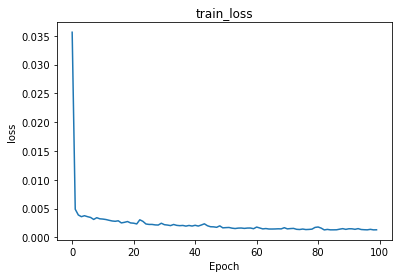

In [37]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(mymodel.history['loss'])

In [38]:
mymodel.history

{'loss': [0.03562486544251442,
  0.004872831515967846,
  0.003879199270159006,
  0.003581979777663946,
  0.0037509913090616465,
  0.0035836193710565567,
  0.0034470215905457735,
  0.0031020850874483585,
  0.0034030149690806866,
  0.003211533185094595,
  0.0031661023385822773,
  0.0030855259392410517,
  0.0029555857181549072,
  0.0028354497626423836,
  0.0027807026635855436,
  0.0028670639730989933,
  0.0024998534936457872,
  0.0026015250477939844,
  0.0027378620579838753,
  0.0024963212199509144,
  0.0024518442805856466,
  0.00232206704095006,
  0.0030413325875997543,
  0.002775295404717326,
  0.00231412285938859,
  0.0022356121335178614,
  0.0022357299458235502,
  0.002152536064386368,
  0.002128437627106905,
  0.002443157136440277,
  0.0021900890860706568,
  0.0021269600838422775,
  0.0020326045341789722,
  0.002227290766313672,
  0.0020734977442771196,
  0.002020485233515501,
  0.0020582606084644794,
  0.0019427846418693662,
  0.002056803787127137,
  0.0019557394552975893,
  0.00208

In [39]:
# total_data_set = pd.concat((train_data['Open'], test_data['Open']), axis=0)
total_data_set = pd.concat((train_data['Close'], test_data['Close']), axis=0)
total_data_set

4713    257.5
4714    260.0
4715    254.0
4716    250.0
4717    243.5
        ...  
4874    235.0
4875    232.0
4876    240.0
4877    244.5
4878    246.0
Name: Close, Length: 555, dtype: float64

In [40]:
inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values
inputs

array([304.5, 295. , 295.5, 296. , 297.5, 297.5, 301. , 295. , 297. ,
       293. , 257.5, 260. , 254. , 250. , 243.5, 244. , 227.5, 237. ,
       230.5, 237. , 238.5, 236.5, 236. , 237. , 230. , 229.5, 219.5,
       221. , 222.5, 223. , 234. , 235.5, 236.5, 235. , 234.5, 234. ,
       236.5, 231. , 231.5, 227.5, 228.5, 231. , 226. , 222. , 218. ,
       219. , 219. , 218.5, 223. , 224. , 226.5, 229. , 225.5, 235. ,
       234. , 226. , 220. , 221. , 219. , 222.5, 226.5, 226. , 222.5,
       223.5, 222.5, 225.5, 221. , 223.5, 220. , 217.5, 216.5, 223. ,
       225.5, 219.5, 215.5, 208. , 213. , 211. , 215.5, 216. , 220.5,
       218.5, 221. , 217.5, 220.5, 218.5, 221. , 223. , 220.5, 222.5,
       226. , 229. , 222.5, 221. , 228. , 230. , 229. , 227. , 227. ,
       230. , 229. , 234.5, 236.5, 236.5, 238. , 239.5, 239. , 235.5,
       233. , 234. , 234. , 230. , 230.5, 235.5, 237. , 234.5, 239. ,
       241. , 240.5, 242. , 245.5, 248.5, 241.5, 244. , 241.5, 242. ,
       245.5, 245.5,

In [41]:
inputs = inputs.reshape(-1,1)
inputs

array([[304.5],
       [295. ],
       [295.5],
       [296. ],
       [297.5],
       [297.5],
       [301. ],
       [295. ],
       [297. ],
       [293. ],
       [257.5],
       [260. ],
       [254. ],
       [250. ],
       [243.5],
       [244. ],
       [227.5],
       [237. ],
       [230.5],
       [237. ],
       [238.5],
       [236.5],
       [236. ],
       [237. ],
       [230. ],
       [229.5],
       [219.5],
       [221. ],
       [222.5],
       [223. ],
       [234. ],
       [235.5],
       [236.5],
       [235. ],
       [234.5],
       [234. ],
       [236.5],
       [231. ],
       [231.5],
       [227.5],
       [228.5],
       [231. ],
       [226. ],
       [222. ],
       [218. ],
       [219. ],
       [219. ],
       [218.5],
       [223. ],
       [224. ],
       [226.5],
       [229. ],
       [225.5],
       [235. ],
       [234. ],
       [226. ],
       [220. ],
       [221. ],
       [219. ],
       [222.5],
       [226.5],
       [226. ],
       [

In [42]:
inputs = sc.transform(inputs)
inputs

array([[0.69927536],
       [0.63043478],
       [0.63405797],
       [0.63768116],
       [0.64855072],
       [0.64855072],
       [0.67391304],
       [0.63043478],
       [0.64492754],
       [0.61594203],
       [0.35869565],
       [0.37681159],
       [0.33333333],
       [0.30434783],
       [0.25724638],
       [0.26086957],
       [0.14130435],
       [0.21014493],
       [0.16304348],
       [0.21014493],
       [0.22101449],
       [0.20652174],
       [0.20289855],
       [0.21014493],
       [0.15942029],
       [0.1557971 ],
       [0.08333333],
       [0.0942029 ],
       [0.10507246],
       [0.10869565],
       [0.1884058 ],
       [0.19927536],
       [0.20652174],
       [0.19565217],
       [0.19202899],
       [0.1884058 ],
       [0.20652174],
       [0.16666667],
       [0.17028986],
       [0.14130435],
       [0.14855072],
       [0.16666667],
       [0.13043478],
       [0.10144928],
       [0.07246377],
       [0.07971014],
       [0.07971014],
       [0.076

In [43]:
x_test = []
for i in range(n, len(inputs)):
    x_test.append(inputs[i-n:i-1, 0])
x_test = np.array(x_test)
x_test

array([[0.69927536, 0.63043478, 0.63405797, ..., 0.67391304, 0.63043478,
        0.64492754],
       [0.63043478, 0.63405797, 0.63768116, ..., 0.63043478, 0.64492754,
        0.61594203],
       [0.63405797, 0.63768116, 0.64855072, ..., 0.64492754, 0.61594203,
        0.35869565],
       ...,
       [0.18115942, 0.16666667, 0.16304348, ..., 0.2173913 , 0.18115942,
        0.19565217],
       [0.16666667, 0.16304348, 0.1557971 , ..., 0.18115942, 0.19565217,
        0.17391304],
       [0.16304348, 0.1557971 , 0.16666667, ..., 0.19565217, 0.17391304,
        0.23188406]])

In [44]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.69927536],
        [0.63043478],
        [0.63405797],
        ...,
        [0.67391304],
        [0.63043478],
        [0.64492754]],

       [[0.63043478],
        [0.63405797],
        [0.63768116],
        ...,
        [0.63043478],
        [0.64492754],
        [0.61594203]],

       [[0.63405797],
        [0.63768116],
        [0.64855072],
        ...,
        [0.64492754],
        [0.61594203],
        [0.35869565]],

       ...,

       [[0.18115942],
        [0.16666667],
        [0.16304348],
        ...,
        [0.2173913 ],
        [0.18115942],
        [0.19565217]],

       [[0.16666667],
        [0.16304348],
        [0.1557971 ],
        ...,
        [0.18115942],
        [0.19565217],
        [0.17391304]],

       [[0.16304348],
        [0.1557971 ],
        [0.16666667],
        ...,
        [0.19565217],
        [0.17391304],
        [0.23188406]]])

In [45]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

array([[0.6562812 ],
       [0.634578  ],
       [0.4019043 ],
       [0.3834965 ],
       [0.36334625],
       [0.32908162],
       [0.28076616],
       [0.2717308 ],
       [0.18076397],
       [0.20314974],
       [0.18631445],
       [0.20992985],
       [0.228076  ],
       [0.2196219 ],
       [0.21182764],
       [0.21634476],
       [0.18133064],
       [0.16564935],
       [0.11208282],
       [0.10107032],
       [0.11113144],
       [0.1179456 ],
       [0.17539822],
       [0.20507905],
       [0.21326856],
       [0.20507456],
       [0.19988003],
       [0.19735993],
       [0.21093352],
       [0.18627037],
       [0.17819057],
       [0.15751423],
       [0.15590121],
       [0.17096703],
       [0.14979775],
       [0.11844287],
       [0.08894495],
       [0.0864462 ],
       [0.08888657],
       [0.08677884],
       [0.10772011],
       [0.12174424],
       [0.13718767],
       [0.15469335],
       [0.14154355],
       [0.18442312],
       [0.1982496 ],
       [0.154

In [46]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[298.5668 ],
       [295.57178],
       [263.4628 ],
       [260.92252],
       [258.14178],
       [253.41327],
       [246.74573],
       [245.49884],
       [232.94542],
       [236.03467],
       [233.7114 ],
       [236.97032],
       [239.47449],
       [238.30782],
       [237.23221],
       [237.85558],
       [233.02364],
       [230.85962],
       [223.46744],
       [221.9477 ],
       [223.33614],
       [224.27649],
       [232.20496],
       [236.30092],
       [237.43106],
       [236.3003 ],
       [235.58344],
       [235.23567],
       [237.10883],
       [233.7053 ],
       [232.5903 ],
       [229.73697],
       [229.51436],
       [231.59344],
       [228.67209],
       [224.34512],
       [220.2744 ],
       [219.92957],
       [220.26636],
       [219.97548],
       [222.86537],
       [224.8007 ],
       [226.9319 ],
       [229.34769],
       [227.533  ],
       [233.45038],
       [235.35844],
       [229.34206],
       [222.6708 ],
       [221.78314],


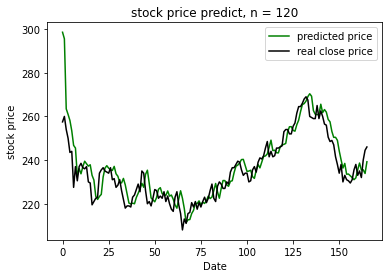

In [47]:
# plt.plot(test_data['Open'].values, color='black', label = "real open price")
plt.plot(predicted_stock_price, color='green', label = "predicted price")
plt.plot(test_data['Close'].values, color='black', label = "real close price")
plt.title('stock price predict, n = {}'.format(n))
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()